# P4DS FINAL PROJECT

| Student ID | Full name       | Github                                               |
|:-----------|:----------------|:-----------------------------------------------------|
| 19127154   | Nguyễn Thế Hưng | [DieuBang](https://github.com/DieuBang)              |
| 19127183   | Dương Minh Khôi | [Wepewour19clc7](https://github.com/Wepewour19clc7)  |

### Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("precision", 2)

## 1. Collecting data

What subject is your data about? What is the source of your data?
- Data fetched from Kaggle, about Pokemon stats

Do authors of this data allow you to use like this? You can check the data license
- Data is available on the public domain

How did authors collect data?
- Author use PokeAPI. Other data sources include PokemonDB, Serebii, Bulbapedia, and Pokemon Wiki

## 2. Exploring data

### Read data from csv file

In [2]:
df = pd.read_csv('pokemon.csv')
df.head(10)

,name,pokedex_number,abilities,typing,hp,attack,defense,special_attack,special_defense,speed,...,ground_attack_effectiveness,fly_attack_effectiveness,psychic_attack_effectiveness,bug_attack_effectiveness,rock_attack_effectiveness,ghost_attack_effectiveness,dragon_attack_effectiveness,dark_attack_effectiveness,steel_attack_effectiveness,fairy_attack_effectiveness
0,Bulbasaur,1,Overgrow~Chlorophyll,Grass~Poison,45,49,49,65,65,45,...,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
1,Ivysaur,2,Overgrow~Chlorophyll,Grass~Poison,60,62,63,80,80,60,...,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
2,Venusaur,3,Overgrow~Chlorophyll,Grass~Poison,80,82,83,100,100,80,...,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
3,Venusaur Gmax,3,Overgrow~Chlorophyll,Grass~Poison,80,82,83,100,100,80,...,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
4,Venusaur Mega,3,Thick Fat,Grass~Poison,80,100,123,122,120,80,...,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
5,Charmander,4,Blaze~Solar Power,Fire,39,52,43,60,50,65,...,2.0,1.0,1.0,0.50,2.0,1.0,1.0,1.0,0.5,0.5
6,Charmeleon,5,Blaze~Solar Power,Fire,58,64,58,80,65,80,...,2.0,1.0,1.0,0.50,2.0,1.0,1.0,1.0,0.5,0.5
7,Charizard,6,Blaze~Solar Power,Fire~Flying,78,84,78,109,85,100,...,0.0,1.0,1.0,0.25,4.0,1.0,1.0,1.0,0.5,0.5
8,Charizard Gmax,6,Blaze~Solar Power,Fire~Flying,78,84,78,109,85,100,...,0.0,1.0,1.0,0.25,4.0,1.0,1.0,1.0,0.5,0.5
9,Charizard Mega X,6,Tough Claws,Fire~Dragon,78,130,111,130,85,100,...,2.0,1.0,1.0,0.50,2.0,1.0,2.0,1.0,0.5,1.0


### How many rows and columns in this dataset?

In [3]:
df.shape

(1118, 49)

There are 1118 rows and 49 columns in this dataset

### What is the meaning of each row?

Each row has information about a Pokemon

### Are there any duplicated rows?

In [4]:
have_duplicated_rows = df.duplicated().sum()

In [5]:
have_duplicated_rows

0

### What is the meaning of each column?

According to the column description on kaggle site, about each column:
- `name`: Name of the Pokemon
- `pokedex_number`: Pokemon's National Dex number
- `abilities`: Potential abilities the Pokemon could have, separated by tilde (~) if there's more than 1 ability
- `typing`: Pokemon's typing, separated by tilde (~) if there's more than 1 type
- `hp`: Base hp stat
- `attack`: Base attack stat
- `defense`: Base defense stat
- `special_attack`: Base special attack stat
- `special_defense`: Base special defense stat
- `speed`: Base speed stat
- `height`: Height of the Pokemon, in decimetres
- `weight`: Weight of the Pokemon, in hectograms
- `genus`: Pokemon genus description
- `gen_introduced`: Generation the Pokemon was first introduced
- `female_rate`: Chance that the Pokemon is a female
- `genderless`: Denotes if the Pokemon is genderless
- `baby_pokemon`: Denotes if the Pokemon is considered to be a baby
- `legendary`: Denotes if the Pokemon is considered to be legendary
- `mythical`: Denotes if the Pokemon is considered to be mythical
- `is_default`: Denotes if the Pokemon is in it's default form (e.g. it is not Mega, G-Max, etc.)
- `forms_switchable`: Denotes if the Pokemon has multiple forms it can switch from
- `base_experience`: Amount of experience gained when the Pokemon is defeated, higher means more XP
- `capture_rate`: Base capture rate of the Pokemon, higher means easier to capture with a max of 255
- `egg_groups`: Names of the egg groups the Pokemon belongs to, separated by tilde (~) if there's more than 1 group
- `egg_cycles`: Value which determines how fast the Pokemon will hatch from an egg
- `base_happiness`: Base happiness of a Pokemon when caught, higher means happier with a max of 255
- `can_evolve`: If the Pokemon can evolve or not
- `evolves_from`: Name of the Pokemon that it evolves from, empty if there is no predecessor
- `primary_color`: Primary color of the Pokemon
- `shape`: the shape of the Pokemon
- `number_pokemon_with_typing`: Total amount of Pokemon with the same typing as it, including itself
- `normal_attack_effectiveness`: How effective a normal type move is against the Pokemon
- `fire_attack_effectiveness`: How effective a fire type move is against the Pokemon
- `water_attack_effectiveness`: How effective a water type move is against the Pokemon
- `electric_attack_effectiveness`: How effective a electric type move is against the Pokemon
- `grass_attack_effectiveness`: How effective a grass type move is against the Pokemon
- `ice_attack_effectiveness`: How effective a ice type move is against the Pokemon
- `fighting_attack_effectiveness`: How effective a fighting type move is against the Pokemon
- `poison_attack_effectiveness`: How effective a poison type move is against the Pokemon
- `ground_attack_effectiveness`: How effective a ground type move is against the Pokemon
- `fly_attack_effectiveness`: How effective a flying type move is against the Pokemon
- `psychic_attack_effectiveness`: How effective a psychic type move is against the Pokemon
- `bug_attack_effectiveness`: How effective a bug type move is against the Pokemon
- `rock_attack_effectiveness`: How effective a rock type move is against the Pokemon
- `ghost_attack_effectiveness`: How effective a ghost type move is against the Pokemon
- `dragon_attack_effectiveness`: How effective a dragon type move is against the Pokemon
- `dark_attack_effectiveness`: How effective a dark type move is against the Pokemon
- `steel_attack_effectiveness`: How effective a steel type move is against the Pokemon
- `fairy_attack_effectiveness`: How effective a fairy type move is against the Pokemon

### What is the current data type of each columns? Are there any columns having inappropriate data types?

In [6]:
df.dtypes.unique()

array([dtype('O'), dtype('int64'), dtype('float64'), dtype('bool')],
      dtype=object)

In [7]:
df[df.dtypes[df.dtypes == object].index].head(10)

,name,abilities,typing,genus,egg_groups,evolves_from,primary_color,shape
0,Bulbasaur,Overgrow~Chlorophyll,Grass~Poison,Seed Pokémon,Monster~Grass,NaN,Green,Quadruped
1,Ivysaur,Overgrow~Chlorophyll,Grass~Poison,Seed Pokémon,Monster~Grass,Bulbasaur,Green,Quadruped
2,Venusaur,Overgrow~Chlorophyll,Grass~Poison,Seed Pokémon,Monster~Grass,Ivysaur,Green,Quadruped
3,Venusaur Gmax,Overgrow~Chlorophyll,Grass~Poison,Seed Pokémon,Monster~Grass,Ivysaur,Green,Quadruped
4,Venusaur Mega,Thick Fat,Grass~Poison,Seed Pokémon,Monster~Grass,Ivysaur,Green,Quadruped
5,Charmander,Blaze~Solar Power,Fire,Lizard Pokémon,Monster~Dragon,NaN,Red,Upright
6,Charmeleon,Blaze~Solar Power,Fire,Flame Pokémon,Monster~Dragon,Charmander,Red,Upright
7,Charizard,Blaze~Solar Power,Fire~Flying,Flame Pokémon,Monster~Dragon,Charmeleon,Red,Upright
8,Charizard Gmax,Blaze~Solar Power,Fire~Flying,Flame Pokémon,Monster~Dragon,Charmeleon,Red,Upright
9,Charizard Mega X,Tough Claws,Fire~Dragon,Flame Pokémon,Monster~Dragon,Charmeleon,Red,Upright


In [8]:
df[df.dtypes[df.dtypes == int].index].head(10)

,pokedex_number,hp,attack,defense,special_attack,special_defense,speed,height,weight,gen_introduced,base_experience,capture_rate,base_happiness
0,1,45,49,49,65,65,45,7,69,1,64,45,70
1,2,60,62,63,80,80,60,10,130,1,142,45,70
2,3,80,82,83,100,100,80,20,1000,1,236,45,70
3,3,80,82,83,100,100,80,240,10000,1,236,45,70
4,3,80,100,123,122,120,80,24,1555,1,281,45,70
5,4,39,52,43,60,50,65,6,85,1,62,45,70
6,5,58,64,58,80,65,80,11,190,1,142,45,70
7,6,78,84,78,109,85,100,17,905,1,240,45,70
8,6,78,84,78,109,85,100,280,10000,1,240,45,70
9,6,78,130,111,130,85,100,17,1105,1,285,45,70


In [9]:
df[df.dtypes[df.dtypes == float].index].head(10)

,female_rate,egg_cycles,number_pokemon_with_typing,normal_attack_effectiveness,fire_attack_effectiveness,water_attack_effectiveness,electric_attack_effectiveness,grass_attack_effectiveness,ice_attack_effectiveness,fighting_attack_effectiveness,...,ground_attack_effectiveness,fly_attack_effectiveness,psychic_attack_effectiveness,bug_attack_effectiveness,rock_attack_effectiveness,ghost_attack_effectiveness,dragon_attack_effectiveness,dark_attack_effectiveness,steel_attack_effectiveness,fairy_attack_effectiveness
0,0.12,20.0,15.0,1.0,2.00,0.5,0.5,0.25,2.0,0.5,...,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
1,0.12,20.0,15.0,1.0,2.00,0.5,0.5,0.25,2.0,0.5,...,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
2,0.12,20.0,15.0,1.0,2.00,0.5,0.5,0.25,2.0,0.5,...,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
3,0.12,20.0,15.0,1.0,2.00,0.5,0.5,0.25,2.0,0.5,...,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
4,0.12,20.0,15.0,1.0,2.00,0.5,0.5,0.25,2.0,0.5,...,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
5,0.12,20.0,34.0,1.0,0.50,2.0,1.0,0.50,0.5,1.0,...,2.0,1.0,1.0,0.50,2.0,1.0,1.0,1.0,0.5,0.5
6,0.12,20.0,34.0,1.0,0.50,2.0,1.0,0.50,0.5,1.0,...,2.0,1.0,1.0,0.50,2.0,1.0,1.0,1.0,0.5,0.5
7,0.12,20.0,7.0,1.0,0.50,2.0,2.0,0.25,1.0,0.5,...,0.0,1.0,1.0,0.25,4.0,1.0,1.0,1.0,0.5,0.5
8,0.12,20.0,7.0,1.0,0.50,2.0,2.0,0.25,1.0,0.5,...,0.0,1.0,1.0,0.25,4.0,1.0,1.0,1.0,0.5,0.5
9,0.12,20.0,3.0,1.0,0.25,1.0,0.5,0.25,1.0,1.0,...,2.0,1.0,1.0,0.50,2.0,1.0,2.0,1.0,0.5,1.0


In [10]:
df.dtypes[df.dtypes == bool]

genderless          bool
baby_pokemon        bool
legendary           bool
mythical            bool
is_default          bool
forms_switchable    bool
can_evolve          bool
dtype: object

## 3. Asking meaningful questions

### Q2: Is dual type better than pure type? What type player should go for?

Dual type seems to have more advantage over pure type as it has more type that mean. But as witnessed in the games many of the top trainer is a type expert aka trainer who specialize in only one type of pokemon. So answering this question would give new players an idea of it and to decide whether to pursuit pure type Pokemon or dual type Pokemon.

## 4. Preprocess + analyzing data to answer questions

### Q2: Is dual type better than pure type? Which one player should go for?
To answer these questions we would consider two factor in the scope of the dataset:
- Base stat of Pokemon: HP, attack, etc.
- Interaction between types

For easy distinguish between a dual-type Pokemon vs a pure-type Pokemon we adding a new feature to denote whether it's dual-type or pure-type.

We find that if the column `typing` contains "~" then save it to `is_dual`

In [11]:
df['is_dual'] = df.typing.str.contains('~')

In [12]:
df[['typing', 'is_dual']].head(10)

,typing,is_dual
0,Grass~Poison,True
1,Grass~Poison,True
2,Grass~Poison,True
3,Grass~Poison,True
4,Grass~Poison,True
5,Fire,False
6,Fire,False
7,Fire~Flying,True
8,Fire~Flying,True
9,Fire~Dragon,True


Seems good now

#### Stat-wise, how strong pure-type vs dual-type?
To have a more general view about how strong a Pokemon is based on its base stats, we add a new column to the data named `total` which is sum of the 6 basic stats

In [13]:
stat_cols = ['hp', 'attack', 'defense', 'special_attack', 'special_defense', 'speed']
stat_total_cols = ['total'] + stat_cols
df['total'] = df[stat_cols].sum(axis=1)

In [14]:
df[stat_total_cols].head(10)

,total,hp,attack,defense,special_attack,special_defense,speed
0,318,45,49,49,65,65,45
1,405,60,62,63,80,80,60
2,525,80,82,83,100,100,80
3,525,80,82,83,100,100,80
4,625,80,100,123,122,120,80
5,309,39,52,43,60,50,65
6,405,58,64,58,80,65,80
7,534,78,84,78,109,85,100
8,534,78,84,78,109,85,100
9,634,78,130,111,130,85,100


Looking good

In [15]:
print('Pure-type')
display(df.loc[~df['is_dual'], stat_total_cols].describe())

Pure-type


,total,hp,attack,defense,special_attack,special_defense,speed
count,521.00,521.0,521.00,521.00,521.00,521.00,521.0
mean,411.81,67.2,75.87,67.60,67.07,67.47,66.6
std,114.35,27.8,30.86,28.08,30.23,26.79,30.2
min,175.00,10.0,5.00,5.00,10.00,20.00,5.0
25%,314.00,50.0,55.00,48.00,45.00,50.00,45.0
50%,418.00,65.0,70.00,63.00,60.00,63.00,64.0
75%,495.00,79.0,98.00,80.00,85.00,83.00,90.0
max,780.00,255.0,180.00,230.00,194.00,200.00,200.0


In [16]:
print('Dual-type')
display(df.loc[df['is_dual'], stat_total_cols].describe())

Dual-type


,total,hp,attack,defense,special_attack,special_defense,speed
count,597.00,597.00,597.00,597.0,597.00,597.00,597.00
mean,466.00,72.49,84.88,81.0,78.61,77.03,71.99
std,119.26,25.37,32.51,32.0,33.39,27.89,29.69
min,185.00,1.00,10.00,15.0,10.00,20.00,5.00
25%,390.00,58.00,60.00,60.0,53.00,55.00,50.00
50%,485.00,70.00,84.00,80.0,74.00,75.00,70.00
75%,530.00,90.00,104.00,100.0,100.00,95.00,95.00
max,1125.00,255.00,190.00,250.0,180.00,250.00,160.00


Tables are great but hard to look at so let's visualize it using box plot and violin plot

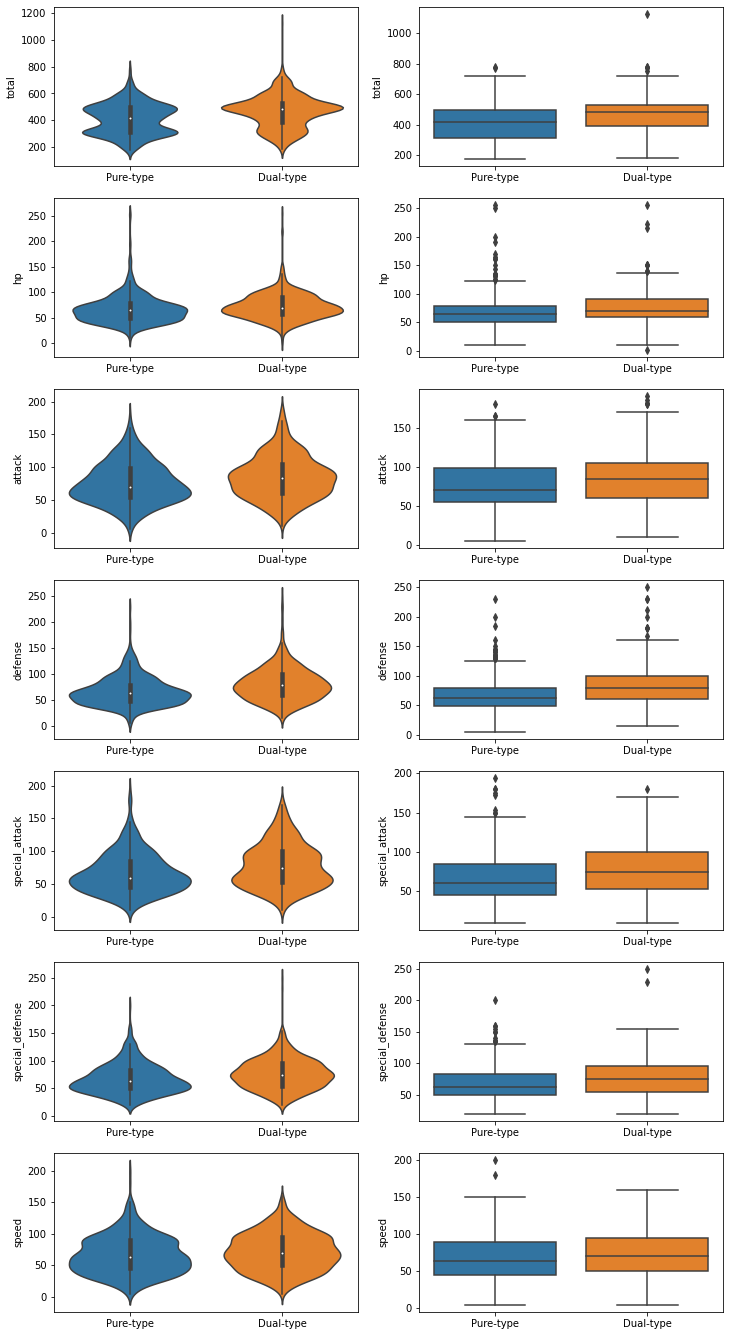

In [17]:
fig, axes = plt.subplots(nrows=len(stat_total_cols), ncols=2, figsize=(12,24))
for i, col in enumerate(stat_total_cols):
    sns.violinplot(x='is_dual', y=col, data=df, ax=axes[i, 0])
    sns.boxplot(x='is_dual', y=col, data=df, ax=axes[i, 1])
    axes[i, 0].set(xticklabels=['Pure-type', 'Dual-type'], xlabel=None)
    axes[i, 1].set(xticklabels=['Pure-type', 'Dual-type'], xlabel=None)

##### Comment
- We can see dual-type has higher mean, median, first quantile, third quantile than pure-type.
- From these graphs above, dual-type Pokemons overall has better base stats compared to pure-type Pokemons.

#### Another aspect that could affect Pokemon is type attack effectiveness

As mentioned above attack effectiveness mean how effective and attack of type `X` on that Pokemon.

We compute a attack effectiveness score that's a sum of all 18 type of attack effectiveness on a Pokemon.

So a "neutral" Pokemon would score 18 (1 for each type) mean it would statistically take the same damage from every other sources, regardless of types.

In [18]:
type_eff = ['normal_attack_effectiveness', 'fire_attack_effectiveness',
            'water_attack_effectiveness', 'electric_attack_effectiveness',
            'grass_attack_effectiveness', 'ice_attack_effectiveness',
            'fighting_attack_effectiveness', 'poison_attack_effectiveness',
            'ground_attack_effectiveness', 'fly_attack_effectiveness',
            'psychic_attack_effectiveness', 'bug_attack_effectiveness',
            'rock_attack_effectiveness', 'ghost_attack_effectiveness',
            'dragon_attack_effectiveness', 'dark_attack_effectiveness',
            'steel_attack_effectiveness', 'fairy_attack_effectiveness']

In [19]:
type_eff_score_df = pd.concat(
    [df['name'], df['typing'], df['is_dual'], df[type_eff].sum(axis=1).rename('score')],
    axis=1)

type_eff_score_df.head(10)

,name,typing,is_dual,score
0,Bulbasaur,Grass~Poison,True,19.25
1,Ivysaur,Grass~Poison,True,19.25
2,Venusaur,Grass~Poison,True,19.25
3,Venusaur Gmax,Grass~Poison,True,19.25
4,Venusaur Mega,Grass~Poison,True,19.25
5,Charmander,Fire,False,18.00
6,Charmeleon,Fire,False,18.00
7,Charizard,Fire~Flying,True,18.50
8,Charizard Gmax,Fire~Flying,True,18.50
9,Charizard Mega X,Fire~Dragon,True,18.00


In [20]:
print('Pure-type')
display(type_eff_score_df[~type_eff_score_df['is_dual']].describe())
print('\nDual-type')
display(type_eff_score_df[type_eff_score_df['is_dual']].describe())

Pure-type


,score
count,521.0
mean,18.7
std,1.4
min,15.0
25%,18.0
50%,18.0
75%,19.5
max,21.5



Dual-type


,score
count,597.00
mean,19.28
std,2.31
min,13.25
25%,18.00
50%,19.00
75%,20.75
max,26.00


On avarage pure-type Pokemons would take less damage than dual-type Pokemons. Let's visualize it.

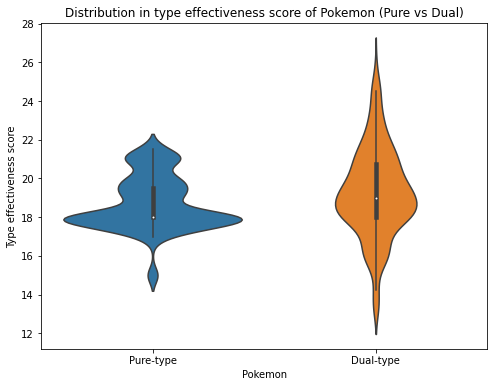

In [21]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.violinplot(x='is_dual', y='score', data=type_eff_score_df)

ax.set_xticklabels(['Pure-type', 'Dual-type'])
ax.set_ylabel('Type effectiveness score')
ax.set_xlabel('Pokemon')
ax.set_title('Distribution in type effectiveness score of Pokemon (Pure vs Dual)')

plt.show()

##### Comment
- Most pure-type Pokemon has a total type effectiveness score of 18 (a neutral score as we proposed earlier).
- More than half of pure-type Pokemon has type effectiveness score below 18. These Pokemon will statistically take less damage than others.
- This mean the player will less likely have to care about the type matchup they are against, hence offload a great amount of information for the new players.
- Whereas dual-type Pokemons the distribution of type effectiveness score is more spread out. It suggest a more in variety of strategy where a Pokemon is weaker/stronger to one type of damage.

#### What about types that Pokemon would take more damage?
We define a weakness as a type attack that Pokemon would take more damage from, depicts by type attack effectiveness > 1

We calculate number of `_attack_effectiveness` > 1 for each Pokemon

In [22]:
num_weakness_df = pd.concat(
    [df['name'], df['is_dual'], (df[type_eff] > 1).sum(axis=1).rename('number_of_weakness')],
    axis=1)

num_weakness_df.head(10)

,name,is_dual,number_of_weakness
0,Bulbasaur,True,4
1,Ivysaur,True,4
2,Venusaur,True,4
3,Venusaur Gmax,True,4
4,Venusaur Mega,True,4
5,Charmander,False,3
6,Charmeleon,False,3
7,Charizard,True,3
8,Charizard Gmax,True,3
9,Charizard Mega X,True,3


In [23]:
print('Pure-type')
display(num_weakness_df[~num_weakness_df['is_dual']].describe())
print('\nDual-type')
display(num_weakness_df[num_weakness_df['is_dual']].describe())

Pure-type


,number_of_weakness
count,521.00
mean,2.56
std,1.22
min,1.00
25%,2.00
50%,3.00
75%,3.00
max,5.00



Dual-type


,number_of_weakness
count,597.00
mean,3.85
std,1.39
min,1.00
25%,3.00
50%,4.00
75%,5.00
max,7.00


On avarage pure-type Pokemons would have less weakness type than dual-type Pokemons. Let's visualize it.

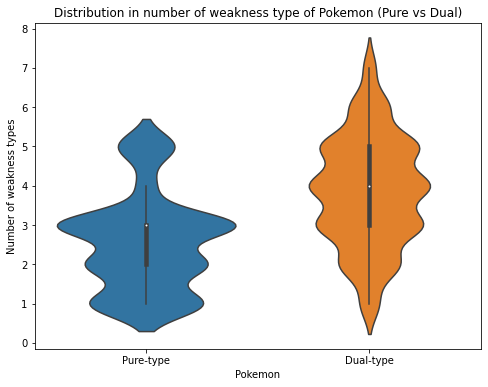

In [24]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.violinplot(x='is_dual', y='number_of_weakness', data=num_weakness_df)

ax.set_xticklabels(['Pure-type', 'Dual-type'])
ax.set_ylabel('Number of weakness types')
ax.set_xlabel('Pokemon')
ax.set_title('Distribution in number of weakness type of Pokemon (Pure vs Dual)')
plt.show()

##### Comment:
- Majority of pure-type Pokemons tend to have less weaknesses type than dual-type Pokemons.
- Distribution of weakness of dual-type Pokemon is more spreaded out, more "balanced", less skewed than pure-type.
- Some set of types may types may have more weakness, while some have less weakness.

#### What about types that Pokemon would take less damage?
We define a resistance as a type attack that Pokemon would take less damage from, depicts by type attack effectiveness < 1

We calculate number of `_attack_effectiveness` < 1 for each Pokemon

In [25]:
num_resistance_df = pd.concat(
    [df['name'], df['is_dual'], (df[type_eff] < 1).sum(axis=1).rename('number_of_resistance')],
    axis=1)

num_resistance_df.head(10)

,name,is_dual,number_of_resistance
0,Bulbasaur,True,5
1,Ivysaur,True,5
2,Venusaur,True,5
3,Venusaur Gmax,True,5
4,Venusaur Mega,True,5
5,Charmander,False,6
6,Charmeleon,False,6
7,Charizard,True,7
8,Charizard Gmax,True,7
9,Charizard Mega X,True,5


In [26]:
print('Pure-type')
display(num_resistance_df[~num_resistance_df['is_dual']].describe())
print('\nDual-type')
display(num_resistance_df[num_resistance_df['is_dual']].describe())

Pure-type


,number_of_resistance
count,521.00
mean,3.38
std,1.83
min,1.00
25%,2.00
50%,3.00
75%,4.00
max,11.00



Dual-type


,number_of_resistance
count,597.00
mean,5.62
std,2.17
min,1.00
25%,4.00
50%,5.00
75%,7.00
max,12.00


On avarage pure-type Pokemons would have less resistance type than dual-type Pokemons. Let's visualize it.

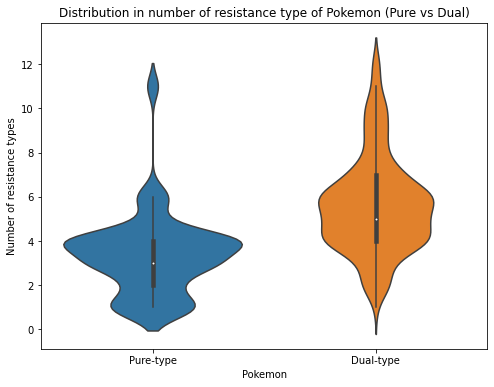

In [27]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.violinplot(x='is_dual', y='number_of_resistance', data=num_resistance_df)

ax.set_xticklabels(['Pure-type', 'Dual-type'])
ax.set_ylabel('Number of resistance types')
ax.set_xlabel('Pokemon')
ax.set_title('Distribution in number of resistance type of Pokemon (Pure vs Dual)')
plt.show()

##### Comment:
- Pure-type Pokemons also tend to have less resistance type than dual-type Pokemons
- On the other hand, dual-type Pokemon while is more vulnerable to more types but also be more resistant to other types of damage. This is an interesting point. Players using dual-type Pokemon have to care more about their opponents type as the strength of their Pokemons is greatly affected by the match up.

#### Verdict
- Dual-type is stat-wise better than pure-type.
- Pure-type offers a "safer", a bit less strategic playstyle compared to dual-type.
- In contrast, dual-type can be consider "high risk, high reward".
- Dual-type is very good in the sense that It add more complexity thus more depth to the game as the player have to consider more on the match up.
- New players should seek out and try to get familiar with pure-type Pokemon first.
- Seasoned players after grasping basic knowledge about the game could go for dual-type as a way to mix things up. Diving deep into game mechanics can overwhelm new players.

## 5. Reflection

### 19127154

#### What difficulties have you encountered?
- The initial dataset our team chose while OK but lacking in features that hinder us from answering some interesting question. So we find another dataset (of the same subject but with more samples and features).
- Document for library is sometimes hard to understanding that make me going for hour searching guide/example. Docs for pandas is relatively easy and straightforward but docs for matplotlib/seaborn is really a nightmare for me.

#### What have you learned?
- Have a good dataset is very important. With the newer, better dataset, exploring and analyzing data is more difficult but as a result it yields more insights.
- I have improved more on visualization with library like matplotlib, seaborn.

## 6. References

- [Pokémon type chart: strengths and weaknesses | Pokémon Database](https://pokemondb.net/type)
- [Type expert - Bulbapedia, the community-driven Pokémon encyclopedia](https://bulbapedia.bulbagarden.net/wiki/Type_expert)